<a href="https://colab.research.google.com/github/AftabUdaipurwala/MachineLearningBasics/blob/ClassificationModels/Outlier_detection_and_removal_using_IQR_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

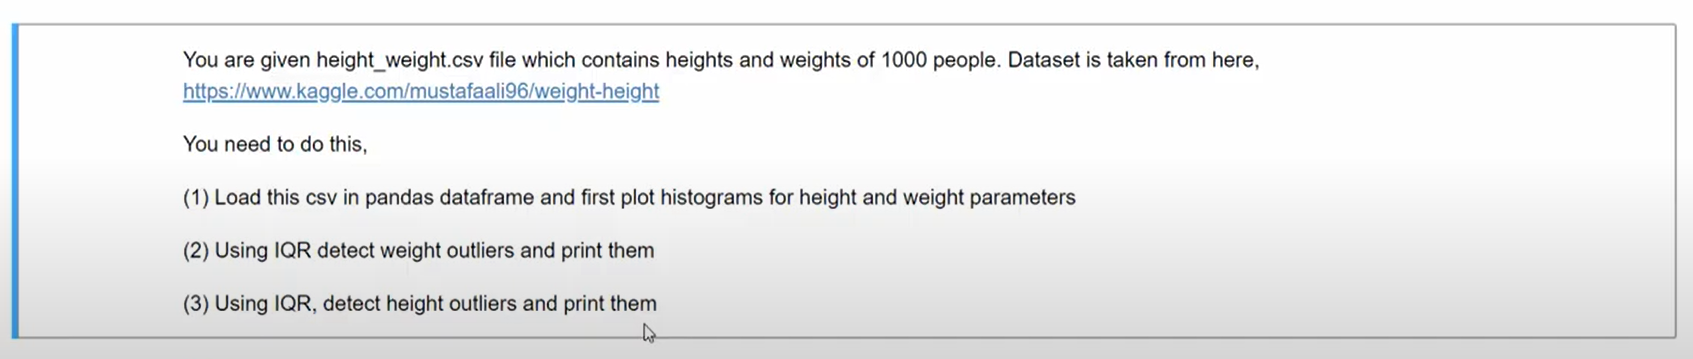

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!ls '/content/drive/MyDrive/py-master/ML/FeatureEngineering/3_outlier_IQR/Exercise'

3_outlier_iqr_exercise.ipynb  height_weight.csv


In [63]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [64]:
df = pd.read_csv('/content/drive/MyDrive/py-master/ML/FeatureEngineering/3_outlier_IQR/Exercise/height_weight.csv')
df.head()

,gender,height,weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


# ***Q1: Plot histogram of height and weight***

(array([  23.,  218.,  926., 1906., 2196., 2167., 1612.,  765.,  163.,
          24.]),
 array([54.26313333, 56.73669423, 59.21025513, 61.68381603, 64.15737693,
        66.63093784, 69.10449874, 71.57805964, 74.05162054, 76.52518144,
        78.99874235]),
 <a list of 10 Patch objects>)

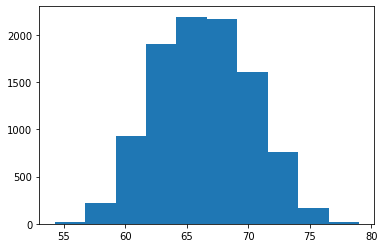

In [65]:
plt.hist(df.height)

(array([  15.,  278., 1241., 2175., 1849., 2016., 1747.,  598.,   71.,
          10.]), array([ 64.70012671,  85.22908389, 105.75804107, 126.28699825,
        146.81595543, 167.34491261, 187.87386979, 208.40282697,
        228.93178415, 249.46074133, 269.98969851]), <a list of 10 Patch objects>)

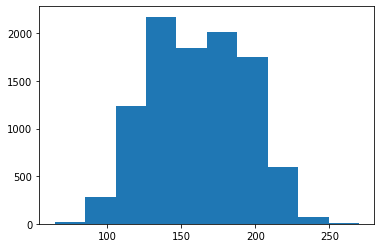

In [66]:
plt.hist(df.weight)

# ***Q2: Get IQR of Hieght***

In [67]:
# Creating a funciton to remove the outliers based on IQR

def IQRFunction(col):
  Q1  = col.quantile(0.25)
  Q3  = col.quantile(0.75)
  IQR = Q3-Q1
  LSL = Q1-1.5*IQR
  USL = Q3+1.5*IQR
  return USL,LSL

In [68]:
USL,LSL=IQRFunction(df.height)

In [69]:
USL,LSL

(77.67722359525831, 55.00265861279534)

In [70]:
df2 = df[(df.height>LSL)&(df.height<USL)]
df2.head()

,gender,height,weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [71]:
df2.shape

(9992, 3)

In [72]:
USL,LSL=IQRFunction(df2.weight)
df3 = df2[(df2.weight>LSL)&(df2.weight<USL)]
df3.head()

,gender,height,weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [73]:
df3.shape

(9992, 3)

(array([  51.,  266.,  962., 1751., 1999., 1989., 1616.,  979.,  317.,
          62.]),
 array([55.14855736, 57.38842026, 59.62828316, 61.86814606, 64.10800895,
        66.34787185, 68.58773475, 70.82759765, 73.06746055, 75.30732344,
        77.54718634]),
 <a list of 10 Patch objects>)

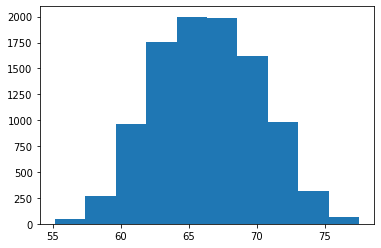

In [76]:
plt.hist(df3.height)

(array([  21.,  289., 1124., 1947., 1717., 1766., 1828., 1038.,  232.,
          30.]), array([ 68.98253009,  87.67060973, 106.35868937, 125.04676901,
        143.73484865, 162.42292829, 181.11100793, 199.79908757,
        218.48716721, 237.17524685, 255.86332649]), <a list of 10 Patch objects>)

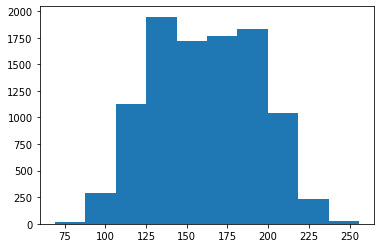

In [78]:
plt.hist(df3.weight)